<a href="https://colab.research.google.com/github/thayportellads/Fraud_Detection/blob/main/02_modelos_e_comparacao_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Modelos de Machine Learning para detectar Fraude de Cartões - Script do Projeto

**Descrição de Dados:**
*   10.000 observações com 10 variáveis
*   Variável alvo: is_fraud
*   Distribuição de classes: Altamente desequilibrada (fraude ≈ 4–5%)

---

**🎯 Objetivo**

Construir e avaliar modelos de aprendizado de máquina capazes de identificar transações fraudulentas com cartão de crédito usando características em nível de transação, como valor, horário, discrepância de localização, confiabilidade do dispositivo e velocidade da transação.

In [ ]:
# importar as bibliotecas necessárias
import pandas             as pd     # manipulação de dados
import numpy              as np     # manipulação de arrays
import matplotlib.pyplot  as plt    # visualização de dados
import seaborn            as sns    # visualização estatística dos dados
import warnings                     # notificações
warnings.filterwarnings('ignore')   # configurar notificações para serem ignoradas

In [ ]:
# importar os dados
dfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/credit_card_fraud_10k.csv')
dfo.head(10)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
5,6,30.53,13,Clothing,0,0,90,2,46,0
6,7,10.77,18,Travel,0,0,48,1,28,0
7,8,362.02,13,Electronics,0,0,68,1,40,0
8,9,165.43,8,Grocery,0,0,80,0,21,0
9,10,221.63,5,Grocery,0,0,59,1,34,0


In [ ]:
# transformando a variável merchant_category em dummy
df_dummies = pd.get_dummies(dfo, columns=['merchant_category'], drop_first=True)
df_dummies.head()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,is_fraud_txt,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,1,84.47,22,0,0,66,3,40,0,Não,True,False,False,False
1,2,541.82,3,1,0,87,1,64,0,Não,False,False,False,True
2,3,237.01,17,0,0,49,1,61,0,Não,False,False,True,False
3,4,164.33,4,0,1,72,3,34,0,Não,False,False,True,False
4,5,30.53,15,0,0,79,0,44,0,Não,False,True,False,False


In [ ]:
# transformando a variavel hora em label e depois em dummy
def faixa_hora(x):
    if 0 <= x < 6:
        return 'madrugada'
    elif 6 <= x < 12:
        return 'manha'
    elif 12 <= x < 18:
        return 'tarde'
    else:
        return 'noite'

dfo['hora_periodo'] = dfo['transaction_hour'].apply(faixa_hora)

# Criando dummies só do período de hora
hora_dummies = pd.get_dummies(dfo['hora_periodo'], prefix='hora_periodo')

# Juntando com o df_dummies
df_final = pd.concat([df_dummies, hora_dummies], axis=1)

In [ ]:
df_final.head()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,is_fraud_txt,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,hora_periodo_madrugada,hora_periodo_manha,hora_periodo_noite,hora_periodo_tarde
0,1,84.47,22,0,0,66,3,40,0,Não,True,False,False,False,False,False,True,False
1,2,541.82,3,1,0,87,1,64,0,Não,False,False,False,True,True,False,False,False
2,3,237.01,17,0,0,49,1,61,0,Não,False,False,True,False,False,False,False,True
3,4,164.33,4,0,1,72,3,34,0,Não,False,False,True,False,True,False,False,False
4,5,30.53,15,0,0,79,0,44,0,Não,False,True,False,False,False,False,False,True


In [ ]:
df_model = df_final.drop(columns=['transaction_hour','is_fraud_txt'])
df_model.head()

,transaction_id,amount,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,hora_periodo_madrugada,hora_periodo_manha,hora_periodo_noite,hora_periodo_tarde
0,1,84.47,0,0,66,3,40,0,True,False,False,False,False,False,True,False
1,2,541.82,1,0,87,1,64,0,False,False,False,True,True,False,False,False
2,3,237.01,0,0,49,1,61,0,False,False,True,False,False,False,False,True
3,4,164.33,0,1,72,3,34,0,False,False,True,False,True,False,False,False
4,5,30.53,0,0,79,0,44,0,False,True,False,False,False,False,False,True


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   transaction_id                 10000 non-null  int64  
 1   amount                         10000 non-null  float64
 2   foreign_transaction            10000 non-null  int64  
 3   location_mismatch              10000 non-null  int64  
 4   device_trust_score             10000 non-null  int64  
 5   velocity_last_24h              10000 non-null  int64  
 6   cardholder_age                 10000 non-null  int64  
 7   is_fraud                       10000 non-null  int64  
 8   merchant_category_Electronics  10000 non-null  bool   
 9   merchant_category_Food         10000 non-null  bool   
 10  merchant_category_Grocery      10000 non-null  bool   
 11  merchant_category_Travel       10000 non-null  bool   
 12  hora_periodo_madrugada         10000 non-null  

Separação da base de treino e teste para aplicação de modelos

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# embaralhar os dados
df_model = df_model.reindex(np.random.permutation(df_model.index))

# separar a classe-alvo das classes independentes
# Separando X e y
X = df_model.drop(['is_fraud', 'transaction_id'], axis=1)
y = df_model['is_fraud']

# verificar tamanho das variáveis
print(f'As variáveis independentes estão em X: {X.shape[0]} registros, { X.shape[1]} atributos')
print(f'A variável alvo "Fraude" está em y: {y.shape[0]} registros.')

As variáveis independentes estão em X: 10000 registros, 14 atributos
A variável alvo "Fraude" está em y: 10000 registros.


In [ ]:
# Separando a base de treino e tese

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, shuffle=True, random_state=42)

# Verificando tamanho dos conjuntos
print(f'O conjunto de treino tem {X_train.shape[0]} registros.')
print(f'O conjunto de testes tem {X_test.shape[0]} registros.')

O conjunto de treino tem 7000 registros.
O conjunto de testes tem 3000 registros.


In [ ]:
# 1. Random Forest com K-Fold (5) + GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
                 precision    recall  f1-score   support

    Fraudulenta       0.66      0.82      0.73        45
Não Fraudulenta       1.00      0.99      1.00      2955

       accuracy                           0.99      3000
      macro avg       0.83      0.91      0.86      3000
   weighted avg       0.99      0.99      0.99      3000

Confusion matrix:
 [[  37    8]
 [  19 2936]]
ROC-AUC Score: 0.9931490881744689


In [ ]:
best_rf_model = grid.best_estimator_

In [ ]:
# 2. KNN com K-Fold (5) + GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'}
                 precision    recall  f1-score   support

    Fraudulenta       0.50      0.73      0.59        45
Não Fraudulenta       1.00      0.99      0.99      2955

       accuracy                           0.98      3000
      macro avg       0.75      0.86      0.79      3000
   weighted avg       0.99      0.98      0.99      3000

Confusion matrix:
 [[  33   12]
 [  33 2922]]
ROC-AUC Score: 0.9055837563451777


In [ ]:
best_knn_model = grid.best_estimator_

In [ ]:
# 3. Decision Tree com K-Fold (5) + GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores parâmetros: {'clf__max_depth': None, 'clf__min_samples_split': 10}
                 precision    recall  f1-score   support

    Fraudulenta       0.62      0.67      0.65        45
Não Fraudulenta       0.99      0.99      0.99      2955

       accuracy                           0.99      3000
      macro avg       0.81      0.83      0.82      3000
   weighted avg       0.99      0.99      0.99      3000

Confusion matrix:
 [[  30   15]
 [  18 2937]]
ROC-AUC Score: 0.8852453468697122


In [ ]:
best_dt_model = grid.best_estimator_

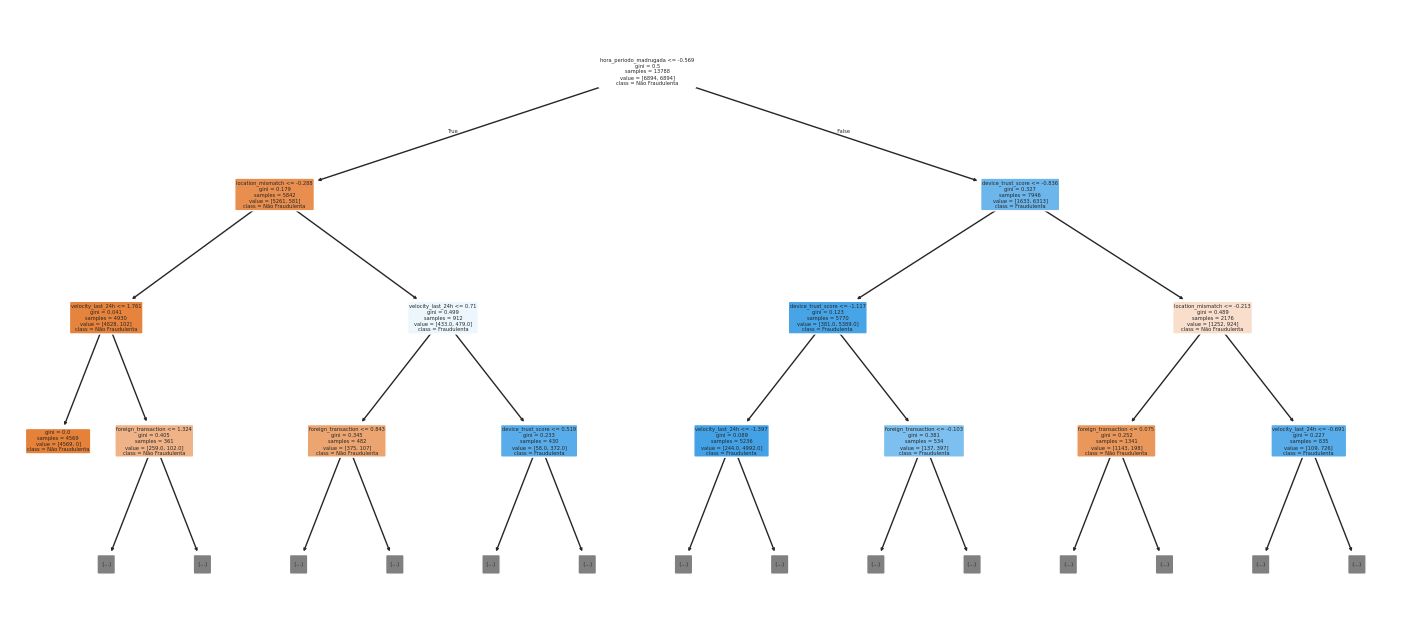

In [ ]:
from sklearn.tree import plot_tree


# Se você usou Pipeline, pega só o classificador:
dt = best_dt_model.named_steps['clf']

plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X_train.columns,  # ou X.columns se treinou com tudo
    class_names=['Não Fraudulenta', 'Fraudulenta'],
    filled=True,
    rounded=True,
    max_depth=3  # Limita a profundidade exibida (opcional)
)
plt.show()

In [ ]:
# 4. Logistic Regression com K-Fold (5) + GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores parâmetros: {'clf__C': 10, 'clf__solver': 'lbfgs'}
                 precision    recall  f1-score   support

    Fraudulenta       0.38      0.96      0.55        45
Não Fraudulenta       1.00      0.98      0.99      2955

       accuracy                           0.98      3000
      macro avg       0.69      0.97      0.77      3000
   weighted avg       0.99      0.98      0.98      3000

Confusion matrix:
 [[  43    2]
 [  69 2886]]
ROC-AUC Score: 0.996029328821207


In [ ]:
best_lr_model = grid.best_estimator_

In [ ]:
# 5. xgboost com K-Fold (5) + GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.1, 0.3]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__learning_rate': 0.3, 'clf__max_depth': 10, 'clf__n_estimators': 200}
                 precision    recall  f1-score   support

    Fraudulenta       0.83      0.87      0.85        45
Não Fraudulenta       1.00      1.00      1.00      2955

       accuracy                           1.00      3000
      macro avg       0.91      0.93      0.92      3000
   weighted avg       1.00      1.00      1.00      3000

Confusion matrix:
 [[  39    6]
 [   8 2947]]
ROC-AUC Score: 0.9976085730400451


In [ ]:
best_xgb_model = grid.best_estimator_

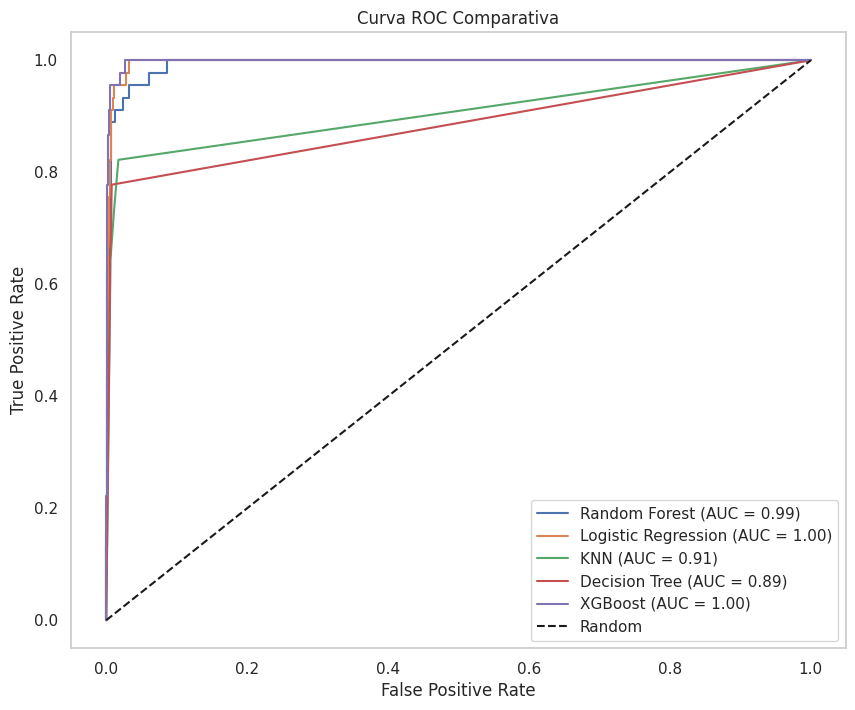

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

modelos = {
    'Random Forest': best_rf_model,        # modelo treinado (grid.best_estimator_)
    'Logistic Regression': best_lr_model,
    'KNN': best_knn_model,
    'Decision Tree': best_dt_model,
    'XGBoost': best_xgb_model
}

plt.figure(figsize=(10, 8))

for nome, modelo in modelos.items():
    # Se usou pipeline/grid, use .predict_proba()
    if hasattr(modelo, "predict_proba"):
        y_score = modelo.predict_proba(X_test)[:, 1]
    else:
        # Some models might have decision_function if not predict_proba (e.g. some SVMs)
        # But for this case, all models have predict_proba through the pipeline.
        y_score = modelo.decision_function(X_test)
    # y_test is already numeric (0s and 1s), so no mapping is needed here.
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

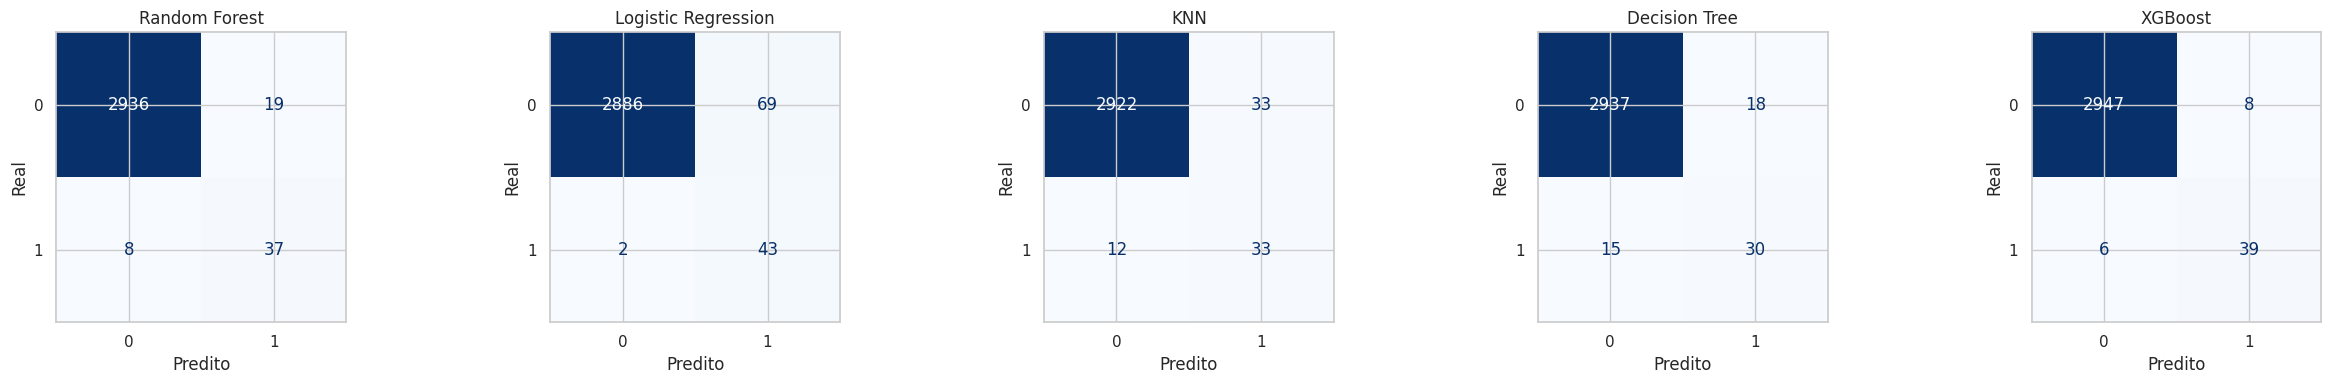

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Faça as previsões usando o conjunto de teste (X_test)
y_preds = {name: model.predict(X_test) for name, model in modelos.items()}

n_models = len(modelos)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 4))

if n_models == 1:
    axes = [axes]  # Garante que axes seja sempre iterável

for ax, (name, y_pred) in zip(axes, y_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()

In [94]:
auc_dict = {}
for nome, modelo in modelos.items():
    y_score = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_dict[nome] = auc_score

# Ordenando do maior para o menor AUC
ranking = sorted(auc_dict.items(), key=lambda x: x[1], reverse=True)

print("Ranking dos modelos por AUC:")
for i, (nome, score) in enumerate(ranking, start=1):
    print(f"{i}. {nome}: AUC = {score:.3f}")

Ranking dos modelos por AUC:
1. XGBoost: AUC = 0.998
2. Logistic Regression: AUC = 0.996
3. Random Forest: AUC = 0.993
4. KNN: AUC = 0.906
5. Decision Tree: AUC = 0.885
